In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1>Data Exploration</h1>

In [3]:
final_crimes = pd.read_csv('final_crimes.csv')

In [4]:
final_crimes.head(3)

,Date,ID,Date.1,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,X Coordinate,Y Coordinate,Location,Year,Month,Day,Hour,Minute,Second,Type_factor
0,2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,0,HARASSMENT BY TELEPHONE,Residence,False,True,935,...,1173974.0,1876757.0,"(41.817229156, -87.637328162)",2003,3,1,0,0,0,0
1,2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,1,FINANCIAL ID THEFT:$300 &UNDER,Residence,False,False,2233,...,1174948.0,1831051.0,"(41.691784636, -87.635115968)",2003,5,1,1,0,0,1
2,2001-01-01 11:00:00,4791194,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,2,PREDATORY,Residence,True,True,531,...,1182247.0,1829375.0,"(41.687020002, -87.60844523)",2001,1,1,11,0,0,2


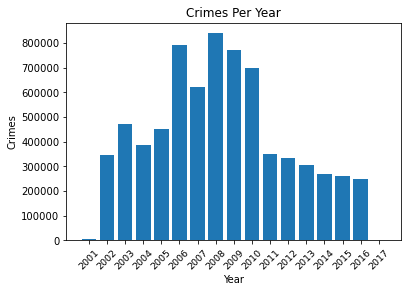

In [5]:
filterCrimes = final_crimes[final_crimes['Year'] > 2000]
filterCrimes = filterCrimes.groupby('Year').count()

filterCrimes.index.name = 'Year'
filterCrimes.reset_index(inplace=True)
plt.title("Crimes Per Year")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.xticks(filterCrimes['Year'],fontsize=9.5,rotation=45)
plt.bar(filterCrimes['Year'],filterCrimes['ID']);

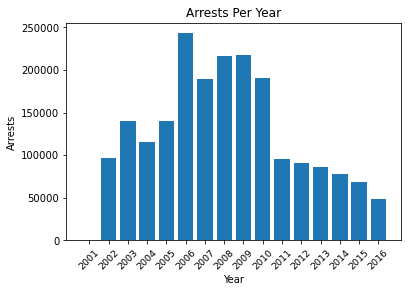

In [6]:
filterArrest = final_crimes[(final_crimes['Arrest']) == True & (final_crimes['Year'] > 2000)]
filterArrest = filterArrest.groupby('Year').sum()

filterArrest.index.name = 'Year'
filterArrest.reset_index(inplace=True)
plt.title("Arrests Per Year")
plt.xlabel("Year")
plt.ylabel("Arrests")
plt.xticks(filterArrest['Year'],fontsize=9.5,rotation=45)
plt.bar(filterArrest['Year'],filterArrest['Arrest']);

Trend of thefts per year. Theft is the most common crime.

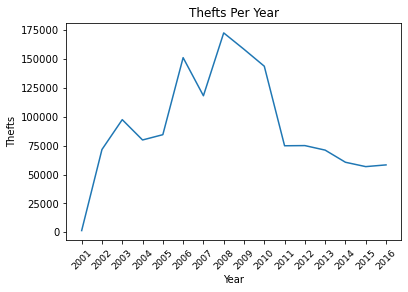

In [7]:
filterTheft = final_crimes[(final_crimes['Primary Type'] == 1) & (final_crimes['Year'] > 2000)]
filterTheft = filterTheft.groupby('Year').size().to_frame('Count').reset_index()

plt.title("Thefts Per Year")
plt.xlabel("Year")
plt.ylabel("Thefts")
plt.xticks(filterTheft['Year'],fontsize=9.5,rotation=45)
plt.plot(filterTheft['Year'],filterTheft['Count']);

<h1>Final Linear Regressions</h1>

<h2>Crimes Per Month</h2>

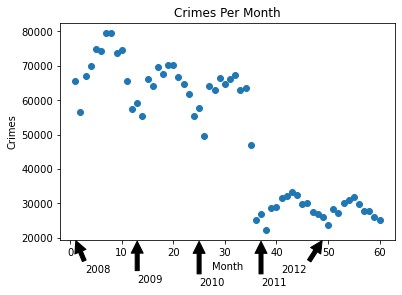

In [8]:
filterMonthCrime1 = final_crimes[(final_crimes['Year'] == 2008)]
filterMonthCrime1 = filterMonthCrime1.groupby(['Month']).count()

filterMonthCrime2 = final_crimes[(final_crimes['Year'] == 2009)]
filterMonthCrime2 = filterMonthCrime2.groupby(['Month']).count()

filterMonthCrime3 = final_crimes[(final_crimes['Year'] == 2010)]
filterMonthCrime3 = filterMonthCrime3.groupby(['Month']).count()

filterMonthCrime4 = final_crimes[(final_crimes['Year'] == 2011)]
filterMonthCrime4 = filterMonthCrime4.groupby(['Month']).count()

filterMonthCrime5 = final_crimes[(final_crimes['Year'] == 2012)]
filterMonthCrime5 = filterMonthCrime5.groupby(['Month']).count()

allMonthCrime = [filterMonthCrime1,filterMonthCrime2,filterMonthCrime3,filterMonthCrime4,filterMonthCrime5]
allMonthCrimes = pd.concat(allMonthCrime)
allMonthCrimes.reset_index(inplace=True)
allMonthCrimes.index = np.arange(1, len(allMonthCrimes)+1)
allMonthCrimes['index1'] = allMonthCrimes.index
plt.title("Crimes Per Month")
plt.xlabel("Month")
plt.ylabel("Crimes")

plt.annotate('2008', xy=(1, 19500), xytext=(3, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2009', xy=(13, 19500), xytext=(13, 7000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2010', xy=(25, 19500), xytext=(25, 6000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2011', xy=(37, 19500), xytext=(37, 6000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2012', xy=(49, 19500), xytext=(41, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.scatter(allMonthCrimes['index1'],allMonthCrimes['ID']);

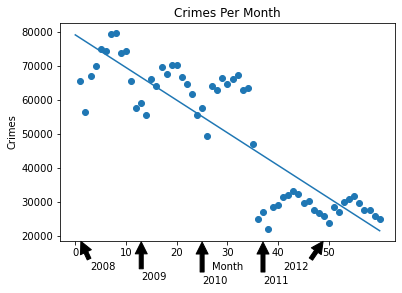

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(allMonthCrimes['index1'][:,np.newaxis],allMonthCrimes['ID'])
xfit = np.linspace(0,60)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(allMonthCrimes['index1'],allMonthCrimes['ID'])
plt.xticks(np.arange(0,60,10))
plt.title("Crimes Per Month")
plt.xlabel("Month")
plt.ylabel("Crimes")

plt.annotate('2008', xy=(1, 18800), xytext=(3, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2009', xy=(13, 18800), xytext=(13, 7000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2010', xy=(25, 18800), xytext=(25, 6000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2011', xy=(37, 18800), xytext=(37, 6000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2012', xy=(49, 18800), xytext=(41, 10000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(xfit,yfit);

In [10]:
from sklearn.model_selection import train_test_split

X = allMonthCrimes['index1'].values.reshape(-1,1)
y = allMonthCrimes['ID'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [[-958.71739911]]
lr.intercept_: [78805.79216323]
Training set score: 0.77
Test set score: 0.73


In [11]:
print('Model slope: ', model.coef_[0])
print('Model intercept: ', model.intercept_)

Model slope:  -958.9573770491808
Model intercept:  79127.83333333334


<b>Model Evaluation</b>

In [12]:
from sklearn import metrics
y_predlr = lr.predict(X_test)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predlr))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predlr))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_predlr)))

Mean Absolute Error:  8364.614911620503
Mean Squared Error:  99853549.56009772
Root Mean Squared Error:  9992.674795073526


In [13]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test, y_predlr))

R^2:  0.7284640790549137


<h2>Arrests Per Month</h2>

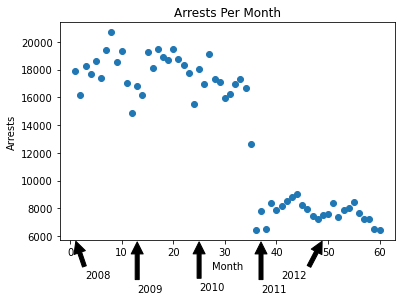

In [14]:
monthArrests = final_crimes[(final_crimes['Arrest']) == True & (final_crimes['Year'] > 2000)]

filterMonthArrest1 = monthArrests[monthArrests['Year'] == 2008]
filterMonthArrest1 = filterMonthArrest1.groupby(['Month']).count()

filterMonthArrest2 = monthArrests[monthArrests['Year'] == 2009]
filterMonthArrest2 = filterMonthArrest2.groupby(['Month']).count()

filterMonthArrest3 = monthArrests[monthArrests['Year'] == 2010]
filterMonthArrest3 = filterMonthArrest3.groupby(['Month']).count()

filterMonthArrest4 = monthArrests[monthArrests['Year'] == 2011]
filterMonthArrest4 = filterMonthArrest4.groupby(['Month']).count()

filterMonthArrest5 = monthArrests[monthArrests['Year'] == 2012]
filterMonthArrest5 = filterMonthArrest5.groupby(['Month']).count()

allMonthArrest = [filterMonthArrest1,filterMonthArrest2,filterMonthArrest3,filterMonthArrest4,filterMonthArrest5]
allMonthArrests = pd.concat(allMonthArrest)
allMonthArrests.reset_index(inplace=True)
allMonthArrests.index = np.arange(1, len(allMonthArrests)+1)
allMonthArrests['index1'] = allMonthArrests.index
plt.title("Arrests Per Month")
plt.xlabel("Month")
plt.ylabel("Arrests")

plt.annotate('2008', xy=(1, 5750), xytext=(3, 3000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2009', xy=(13, 5750), xytext=(13, 2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2010', xy=(25, 5750), xytext=(25, 2100),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2011', xy=(37, 5750), xytext=(37, 2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2012', xy=(49, 5750), xytext=(41, 3000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.scatter(allMonthArrests['index1'],allMonthArrests['ID']);

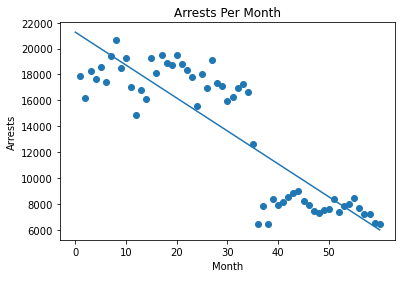

In [15]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(allMonthArrests['index1'][:,np.newaxis],allMonthArrests['ID'])
xfit2 = np.linspace(0,60)
yfit2 = model2.predict(xfit2[:,np.newaxis])

plt.scatter(allMonthArrests['index1'],allMonthArrests['ID'])
plt.xticks(np.arange(0,60,10))
plt.title("Arrests Per Month")
plt.xlabel("Month")
plt.ylabel("Arrests")
plt.annotate('2008', xy=(1, 5200), xytext=(3, 3000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2009', xy=(13, 5200), xytext=(13, 2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2010', xy=(25, 5200), xytext=(25, 2100),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2011', xy=(37, 5200), xytext=(37, 2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('2012', xy=(49, 5200), xytext=(41, 3000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(xfit2,yfit2);

In [16]:
from sklearn.model_selection import train_test_split

X2 = allMonthArrests['index1'].values.reshape(-1,1)
y2 = allMonthArrests['ID'].values.reshape(-1,1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

print("lr.coef_:", lr2.coef_)
print("lr.intercept_:", lr2.intercept_)

print("Training set score: {:.2f}".format(lr2.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(lr2.score(X_test2, y_test2)))


lr.coef_: [[-257.05873095]]
lr.intercept_: [21375.64703859]
Training set score: 0.78
Test set score: 0.71


In [17]:
print('Model slope: ', model2.coef_[0])
print('Model intercept: ', model2.intercept_)

Model slope:  -254.22389552653524
Model intercept:  21263.695480225993


<b>Model Evaluation</b>

In [18]:
from sklearn import metrics
y_predlr2 = lr2.predict(X_test2)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test2, y_predlr2))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test2, y_predlr2))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test2, y_predlr2)))

Mean Absolute Error:  2252.202295507673
Mean Squared Error:  7253285.461811844
Root Mean Squared Error:  2693.192429406381


In [19]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test2, y_predlr2))

R^2:  0.7108328010558878


<h1>Initial Linear Regressions</h1>

<h2>Crimes Per Year</h2>

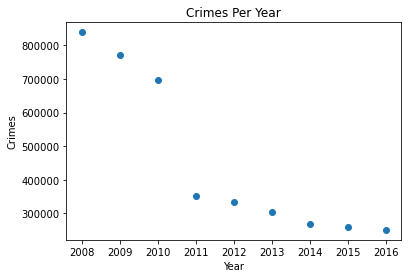

In [20]:
filterYearCrimes = final_crimes[(final_crimes['Year'] > 2007) & (final_crimes['Year'] < 2017)]
filterYearCrimes = filterYearCrimes.groupby(['Year']).count()
filterYearCrimes.reset_index(inplace=True)
plt.title("Crimes Per Year")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.scatter(filterYearCrimes['Year'],filterYearCrimes['ID']);

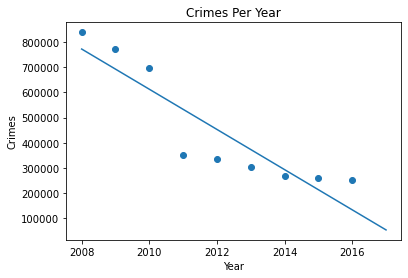

In [21]:
model3 = LinearRegression()
model3.fit(filterYearCrimes['Year'][:,np.newaxis],filterYearCrimes['ID'])
xfit3 = np.linspace(2008,2017)
yfit3 = model3.predict(xfit3[:,np.newaxis])

plt.scatter(filterYearCrimes['Year'],filterYearCrimes['ID'])
plt.xticks(np.arange(2008, 2017, 2))
plt.title("Crimes Per Year")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.plot(xfit3,yfit3);

In [22]:
X3 = filterYearCrimes['Year'].values.reshape(-1,1)
y3 = filterYearCrimes['ID'].values.reshape(-1,1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=0)
lr3 = LinearRegression()
lr3.fit(X_train3, y_train3)

print("lr.coef_:", lr3.coef_)
print("lr.intercept_:", lr3.intercept_ + lr3.coef_ * 2008)

print("Training set score: {:.2f}".format(lr3.score(X_train3, y_train3)))
print("Test set score: {:.2f}".format(lr3.score(X_test3, y_test3)))

lr.coef_: [[-70815.61607143]]
lr.intercept_: [[698273.16964284]]
Training set score: 0.76
Test set score: 0.71


In [23]:
print('Model slope: ', model3.coef_[0])
print('Model intercept: ', model3.intercept_ + model3.coef_[0]*2008)

Model slope:  -79844.58333333333
Model intercept:  772346.777777791


<b>Model Evaluation</b>

In [24]:
from sklearn import metrics
y_predlr3 = lr3.predict(X_test3)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test3, y_predlr3))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test3, y_predlr3))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test3, y_predlr3)))

Mean Absolute Error:  113873.21726192038
Mean Squared Error:  14583155375.684937
Root Mean Squared Error:  120760.7360679991


In [25]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test3, y_predlr3))

R^2:  0.713979913519253


<h2>Arrests Per Year</h2>

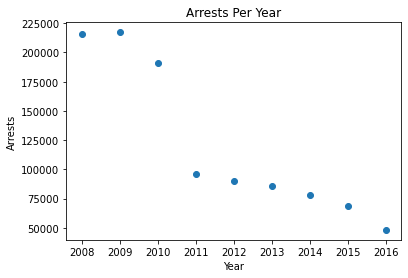

In [26]:
filterYearArrests = final_crimes[(final_crimes['Arrest'] == True)
                                   & (final_crimes['Year'] > 2007) &
                                   (final_crimes['Year'] < 2017)]
plt.title("Arrests Per Year")
plt.xlabel("Year")
plt.ylabel("Arrests")
filterYearArrests = filterYearArrests.groupby(['Year']).count()
filterYearArrests.reset_index(inplace=True)
plt.scatter(filterYearArrests['Year'],filterYearArrests['ID']);

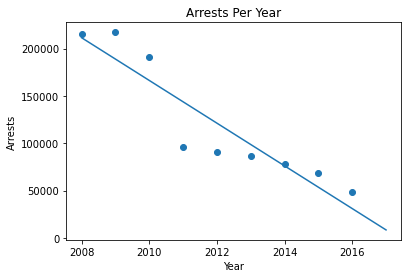

In [27]:
model4 = LinearRegression()
model4.fit(filterYearArrests['Year'][:,np.newaxis],filterYearArrests['ID'])
xfit4 = np.linspace(2008,2017)
yfit4 = model4.predict(xfit4[:,np.newaxis])

plt.scatter(filterYearArrests['Year'],filterYearArrests['ID'])
plt.xticks(np.arange(2008, 2017, 2))
plt.title("Arrests Per Year")
plt.xlabel("Year")
plt.ylabel("Arrests")
plt.plot(xfit4,yfit4);

In [28]:
X4 = filterYearArrests['Year'].values.reshape(-1,1)
y4 = filterYearArrests['ID'].values.reshape(-1,1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=3)
lr4 = LinearRegression()
lr4.fit(X_train4, y_train4)

print("lr.coef_:", lr4.coef_)
print("lr.intercept_:", lr4.intercept_ + lr4.coef_ * 2008)

print("Training set score: {:.2f}".format(lr4.score(X_train4, y_train4)))
print("Test set score: {:.2f}".format(lr4.score(X_test4, y_test4)))

lr.coef_: [[-23028.18072289]]
lr.intercept_: [[206265.13253012]]
Training set score: 0.84
Test set score: 0.83


In [29]:
print('Model slope: ', model4.coef_[0])
print('Model intercept: ', model4.intercept_ + model4.coef_[0]*2008)

Model slope:  -22555.950000000008
Model intercept:  211469.24444444478


<b>Model Evaluation</b>

In [30]:
from sklearn import metrics
y_predlr4 = lr4.predict(X_test4)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test4, y_predlr4))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test4, y_predlr4))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test4, y_predlr4)))

Mean Absolute Error:  21279.104417674243
Mean Squared Error:  526190237.3616268
Root Mean Squared Error:  22938.836879005587


In [31]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(y_test4, y_predlr4))

R^2:  0.8298860485186963
